In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
kratdata=pd.read_csv('krat_energy_equal.csv',header=None)
kratdata.columns = ['krat_id', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','snakes_in_cell','owls_in_cell']
snakedata=pd.read_csv('snake_energy_equal.csv',header=None)
snakedata.columns = ['snake_id', 'cycle','open_pw','bush_pw','energy_score','movements','cell_id','microhabitat','krats_in_cell','owls_in_cell']
#kratdata.sort_values(by=['owls_in_cell'], ascending=False).head(20)
#snakedata.head().sort_values(by=['owls_in_cell'], ascending=False)

MemoryError: Unable to allocate 3.09 GiB for an array with shape (6, 69187204) and data type int64

In [3]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

In [68]:
## Krat individual check
#kratdata.head()
# idoi = 2267458398536
ktemp = kratdata[kratdata['bush_pw']==0]
ktemp = ktemp[ktemp['cycle']==49]
ktemp.head(55)

,krat_id,cycle,open_pw,bush_pw,energy_score,movements,cell_id,microhabitat,snakes_in_cell,owls_in_cell
6869,2892580746248,49,1.0,0.0,245,45,"(1, 7)",OPEN,0,0
6870,2892580746696,49,1.0,0.0,245,43,"(1, 7)",OPEN,0,0
6872,2892580747656,49,1.0,0.0,137,44,"(1, 11)",OPEN,0,0
6873,2892580747720,49,1.0,0.0,245,46,"(1, 13)",OPEN,0,0
6876,2892580745736,49,1.0,0.0,233,45,"(2, 10)",OPEN,0,0
6879,2892580746312,49,1.0,0.0,-139,47,"(2, 13)",OPEN,0,0
6882,2892580746888,49,1.0,0.0,245,45,"(3, 6)",OPEN,0,0
6886,2892580747528,49,1.0,0.0,245,43,"(3, 14)",OPEN,0,0
6888,2892580712392,49,1.0,0.0,245,40,"(4, 2)",OPEN,0,0
6889,2892580746504,49,1.0,0.0,245,45,"(4, 3)",OPEN,0,0


In [12]:
## snake individual check
idoi = 2125413594440
stemp = snakedata[snakedata['snake_id']==idoi]
#stemp.head(50)

Text(0.5, 1.0, 'Snake Count')

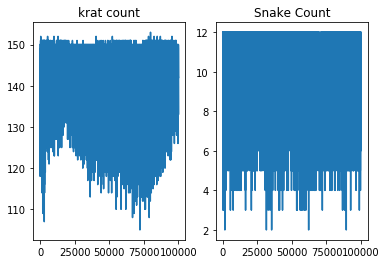

In [4]:
########## Population Counts ###############
df = kratdata[["cycle", "krat_id"]].groupby("cycle").krat_id.nunique()
df = df.reset_index()
df.columns = ['cycle','krats']
df2 = snakedata[["cycle", "snake_id"]].groupby("cycle").snake_id.nunique()
df2 = df2.reset_index()
df2.columns = ['cycle','snakes']


#Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
ax = axs[0]
ax.plot(df['cycle'], df['krats'])
ax.set_title('krat count')

ax = axs[1]
ax.plot(df2['cycle'], df2['snakes'])
ax.set_title('Snake Count')

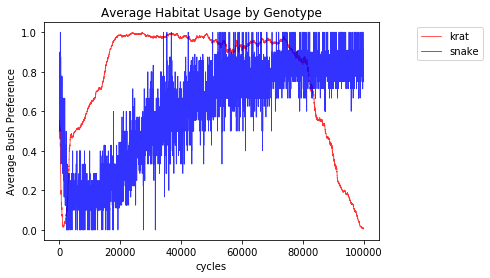

In [5]:
df = kratdata[["cycle", "bush_pw"]].groupby("cycle").mean()
df = df.reset_index()
df.columns = ['cycle','bush_pw']
df2 = snakedata[["cycle", "bush_pw"]].groupby("cycle").mean()
df2 = df2.reset_index()
df2.columns = ['cycle','bush_pw']


#Now switch to a more OO interface to exercise more features.
plt.plot(df['cycle'], df["bush_pw"],'red', linewidth=.8, alpha=0.8, label = 'krat')
plt.plot(df2['cycle'], df2["bush_pw"],'blue', linewidth=.8, alpha=0.8, label = 'snake')
plt.xlabel("cycles")
plt.ylabel("Average Bush Preference")
plt.title("Average Habitat Usage by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')
plt.show()

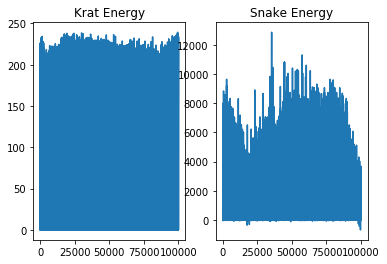

In [6]:
########## Population energy ###############
df = kratdata[["cycle", "energy_score"]].groupby("cycle").mean()
df = df.reset_index()
df.columns = ['cycle','energy_score']
df2 = snakedata[["cycle", "energy_score"]].groupby("cycle").mean()
df2 = df2.reset_index()
df2.columns = ['cycle','energy_score']


#Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
ax = axs[1]
ax.plot(df2['cycle'], df2['energy_score'])
ax.set_title('Snake Energy')


ax = axs[0]
ax.plot(df['cycle'], df['energy_score'])
ax.set_title('Krat Energy')
plt.show()

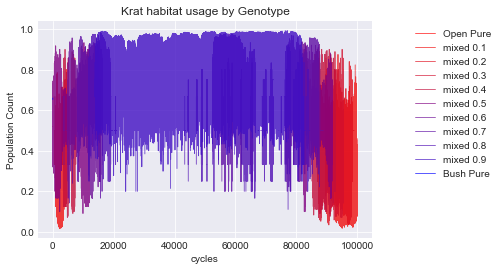

In [7]:
df = kratdata.groupby(["cycle","bush_pw", "microhabitat"]).krat_id.nunique()
df = df.reset_index()
df.columns = ['cycle','bush_pw','cur_micro_hab', "Pop Count"]
df = df.pivot_table(
        values="Pop Count", 
        index=['cycle','bush_pw'], 
        columns='cur_micro_hab', 
        aggfunc=np.sum)
df = df.reset_index()
df["bush_actual_proportion"] = df['BUSH']/(df['BUSH'] + df['OPEN'])
df = df.pivot(index="cycle", columns="bush_pw",values = "bush_actual_proportion").reset_index()
df.columns = list(df.columns)
#df = df.iloc[:, [0, 1,5]]
#df.head()

col_name = []
color_dict = {}
color_change = 15

blue_counter = 1
red_counter = 1
rand_counter = 1
df.columns
for i in df.columns:
    label = ''
    if i == 1:
        label = 'Bush Pure'
        if label not in color_dict:
            color_dict[label] = (0,0,255)
    elif i == 0:
        label = 'Open Pure'
        if label not in color_dict:
            color_dict[label] = (255,0,0)
    elif i == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i)
        if float(i) < 0.5:
            if label not in color_dict:
                red = 255 - color_change*red_counter
                blue = 0 + color_change*red_counter
                color_dict[label] = (red,15,blue)
                red_counter += 1
        elif float(i) > 0.5:
            if label not in color_dict:
                red = 125 - color_change*blue_counter
                blue = 135 + color_change*blue_counter
                color_dict[label] = (red,15,blue)
                blue_counter += 1
        elif float(i) == 0.5:
            if label not in color_dict:
                color_dict[label] = (128,0,128)  
    col_name.append(label)
    
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))

#
# style
plt.style.use('seaborn-darkgrid')

plt.figure()
for i in cols:
    plt.plot(df['cycle'], df[i],rgb_to_hex(color_dict[i]), linewidth=.8, alpha=0.8, label = i)

plt.xlabel("cycles")
plt.ylabel("Population Count")
plt.title("Krat habitat usage by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

plt.show()

C:\Users\micha\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


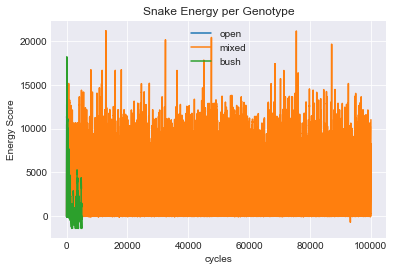

In [16]:
df = snakedata.groupby(["cycle", "bush_pw"]).agg({"energy_score": ['mean']}).reset_index()
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns = ["cycle","open","mixed","bush"]
plt.figure()
plt.plot(df['cycle'], df['open'], label = 'open')
plt.plot(df['cycle'], df['mixed'], label = 'mixed')
plt.plot(df['cycle'], df['bush'], label = 'bush')
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("cycles")
plt.ylabel("Energy Score")
plt.title("Snake Energy per Genotype")
plt.legend()

plt.show()

In [54]:

#purple = [128,0,128]
#blue = [0,0,255]
#red = [255,0,0]



[265, 0, 0]


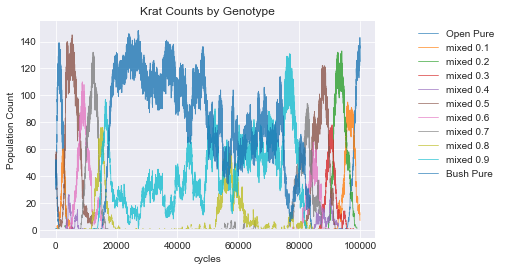

In [8]:


df = kratdata.groupby(["cycle", "bush_pw"]).krat_id.nunique()
df = df.reset_index()
df.columns = ['cycle','bush_pw', "Pop Count"]
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns
col_name = []
color_dict = {}
color_change = 15

blue_counter = 1
red_counter = 1
rand_counter = 1
for i in df.columns:
    label = ''
    if i[1] == 1:
        label = 'Bush Pure'
        if label not in color_dict:
            color_dict[label] = (0,0,255)
    elif i[1] == 0:
        label = 'Open Pure'
        if label not in color_dict:
            color_dict[label] = (255,0,0)
    elif i[0] == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i[1])
        if i[1] < 0.5:
            if label not in color_dict:
                red = 255 - color_change*red_counter
                blue = 0 + color_change*red_counter
                color_dict[label] = (red,15,blue)
                red_counter += 1
        elif i[1] > 0.5:
            if label not in color_dict:
                red = 125 - color_change*blue_counter
                blue = 135 + color_change*blue_counter
                color_dict[label] = (red,15,blue)
                blue_counter += 1
        elif i[1] == 0.5:
            if label not in color_dict:
                color_dict[label] = (128,0,128)  
    col_name.append(label)
    
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))

#
# style
plt.style.use('seaborn-darkgrid')

plt.figure()
for i in cols:
    #plt.plot(df['cycle'], df[i],rgb_to_hex(color_dict[i]), linewidth=.8, alpha=0.8, label = i)
    plt.plot(df['cycle'], df[i], linewidth=.8, alpha=0.8, label = i)

plt.xlabel("cycles")
plt.ylabel("Population Count")
plt.title("Krat Counts by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

plt.show()

In [ ]:
df = kratdata.groupby(["cycle", "bush_pw"]).krat_id.nunique()
df = df.reset_index()
df.columns = ['cycle','bush_pw', "Pop Count"]
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
# df.columns
# col_name = []
# color_dict = {}
# color_change = 15

# blue_counter = 1
# red_counter = 1
# rand_counter = 1
# for i in df.columns:
#     label = ''
#     if i[1] == 1:
#         label = 'Bush Pure'
#         if label not in color_dict:
#             color_dict[label] = (0,0,255)
#     elif i[1] == 0:
#         label = 'Open Pure'
#         if label not in color_dict:
#             color_dict[label] = (255,0,0)
#     elif i[0] == 'cycle':
#         label = 'cycle'
#     else:
#         label = 'mixed {}'.format(i[1])
#         if i[1] < 0.5:
#             if label not in color_dict:
#                 red = 255 - color_change*red_counter
#                 blue = 0 + color_change*red_counter
#                 color_dict[label] = (red,15,blue)
#                 red_counter += 1
#         elif i[1] > 0.5:
#             if label not in color_dict:
#                 red = 125 - color_change*blue_counter
#                 blue = 135 + color_change*blue_counter
#                 color_dict[label] = (red,15,blue)
#                 blue_counter += 1
#         elif i[1] == 0.5:
#             if label not in color_dict:
#                 color_dict[label] = (128,0,128)  
#     col_name.append(label)
    
# df.columns = col_name

# cols = list(filter(lambda x: x!='cycle' , list(df)))

# #
# # style
# plt.style.use('seaborn-darkgrid')

# plt.figure()
# for i in cols:
#     plt.plot(df['cycle'], df[i],rgb_to_hex(color_dict[i]), linewidth=.8, alpha=0.8, label = i)

# plt.xlabel("cycles")
# plt.ylabel("Population Count")
# plt.title("Krat Counts by Genotype")
# plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

# plt.show()

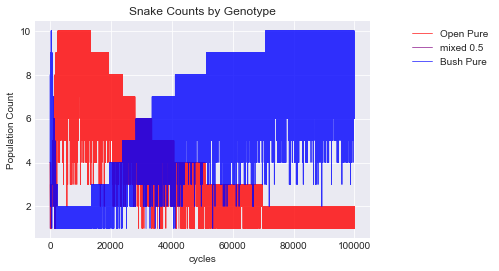

In [9]:
df = snakedata.groupby(["cycle", "bush_pw"]).snake_id.nunique()
df = df.reset_index()
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns
col_name = []
color_dict = {}
color_change = 35

blue_counter = 1
red_counter = 1
for i in df.columns:
    label = ''
    if i[1] == 1:
        label = 'Bush Pure'
        if label not in color_dict:
            color_dict[label] = (0,0,255)
    elif i[1] == 0:
        label = 'Open Pure'
        if label not in color_dict:
            color_dict[label] = (255,0,0)
    elif i[0] == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i[1])
        if i[1] < 0.5:
            if label not in color_dict:
                red = 255 - color_change*red_counter
                blue = 0 + color_change*red_counter
                color_dict[label] = (red,0,blue)
                red_counter += 1
        elif i[1] > 0.5:
            if label not in color_dict:
                red = 125 - color_change*blue_counter
                blue = 135 + color_change*blue_counter
                color_dict[label] = (red,0,blue)
                blue_counter += 1
        elif i[1] == 0.5:
            if label not in color_dict:
                color_dict[label] = (128,0,128)  
    col_name.append(label)
    
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))

#
plt.figure()
for i in cols:
    plt.plot(df['cycle'], df[i],rgb_to_hex(color_dict[i]), linewidth=.8, alpha=0.8,  label = i)

plt.xlabel("cycles")
plt.ylabel("Population Count")
plt.title("Snake Counts by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

plt.show()

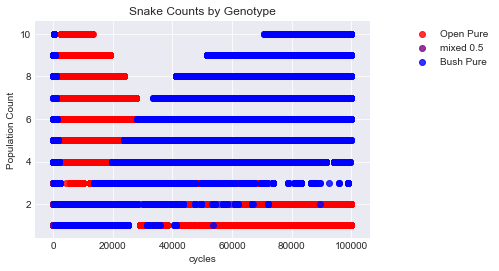

In [10]:
df = snakedata.groupby(["cycle", "bush_pw"]).snake_id.nunique()
df = df.reset_index()
df = df.pivot(index="cycle", columns="bush_pw").reset_index()
df.columns
col_name = []
color_dict = {}
color_change = 35

blue_counter = 1
red_counter = 1
for i in df.columns:
    label = ''
    if i[1] == 1:
        label = 'Bush Pure'
        if label not in color_dict:
            color_dict[label] = (0,0,255)
    elif i[1] == 0:
        label = 'Open Pure'
        if label not in color_dict:
            color_dict[label] = (255,0,0)
    elif i[0] == 'cycle':
        label = 'cycle'
    else:
        label = 'mixed {}'.format(i[1])
        if i[1] < 0.5:
            if label not in color_dict:
                red = 255 - color_change*red_counter
                blue = 0 + color_change*red_counter
                color_dict[label] = (red,0,blue)
                red_counter += 1
        elif i[1] > 0.5:
            if label not in color_dict:
                red = 125 - color_change*blue_counter
                blue = 135 + color_change*blue_counter
                color_dict[label] = (red,0,blue)
                blue_counter += 1
        elif i[1] == 0.5:
            if label not in color_dict:
                color_dict[label] = (128,0,128)  
    col_name.append(label)
    
df.columns = col_name

cols = list(filter(lambda x: x!='cycle' , list(df)))

#
plt.figure()
for i in cols:
    plt.scatter(df['cycle'], df[i],color =rgb_to_hex(color_dict[i]), alpha=0.8 , label = i)

plt.xlabel("cycles")
plt.ylabel("Population Count")
plt.title("Snake Counts by Genotype")
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left')

plt.show()

In [6]:
###### Old script for code ref #################


data_initial_time= data['time']== min(data['time'])
data_initial_time = data[data_initial_time]
initial_time = data_initial_time['time'].max()
initial_krat_pop = data_initial_time['krat_pop'].sum()
initial_snake_pop = data_initial_time['snake_pop'].sum()
prompt = 'time: {},  Krats {}, Snakes {}'.format(initial_time,initial_krat_pop,initial_snake_pop)
cells = data['cell_id'].unique()
print('Number Of Cells: {}'.format(len(cells)))
print('Initial Stats')
print(prompt)

data_final_time= data['time']== max(data['time'])
data_final_time = data[data_final_time]
final_time = data_final_time['time'].max()
final_krat_pop = data_final_time['krat_pop'].sum()
final_snake_pop = data_final_time['snake_pop'].sum()
prompt = 'time: {}, Krats {}, Snakes {}'.format(final_time,final_krat_pop,final_snake_pop)
print('Final Stats')
print(prompt)


Number Of Cells: 2500
Initial Stats
time: 0,  Krats 100, Snakes 8
Final Stats
time: 8748, Krats 100, Snakes 8


100.0


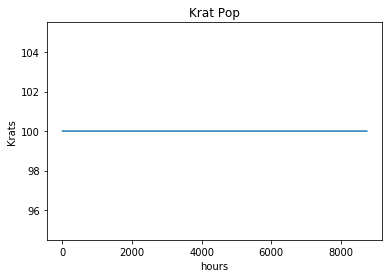

In [7]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "krat_pop"]].groupby("time").sum()
ytemp = list(df.stack())
y = [float(y) for y in ytemp]
xtemp= list(df.index)
x = xtemp[0:len(y)]
print(min(y))

plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krats")
plt.title("Krat Pop")

plt.show()

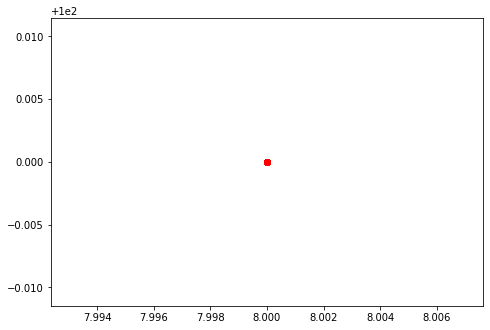

In [8]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "krat_pop","snake_pop"]].groupby("time").sum()
df = df.reset_index()
x = df['snake_pop']
y = df['krat_pop']
#ytemp = list(df.stack())
#y = [float(y) for y in ytemp]
#xtemp= list(df.index)
#x = xtemp[0:len(y)]
#print(min(y))
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y, color='r')

#plt.xlabel("hours")
#plt.ylabel("Krats")
#plt.title("Krat Pop")

plt.show()

Krat
Percent of Time in Bush
0.5266392694063927


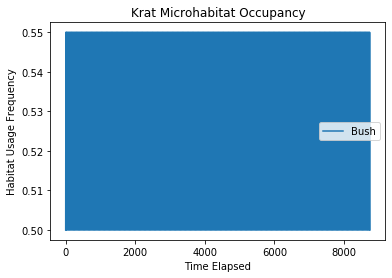

In [9]:
df = data.groupby(["time","habitat_type"]).agg({'krat_pop': ['sum']}).reset_index()
df.columns = ['time','habitat_type','krat_pop']
df = df.pivot(index='time', columns='habitat_type', values='krat_pop').reset_index()
print('Krat')
print('Percent of Time in Bush')
print(df['BUSH'].sum()/(df['BUSH'].sum()+df['OPEN'].sum()))
df['BUSH_OCC'] = df['BUSH']/(df['BUSH']+df['OPEN'])
df['OPEN_OCC'] = df['OPEN']/(df['BUSH']+df['OPEN'])
df= df[['time','BUSH_OCC','OPEN_OCC']]
# line 1 points

# plotting the line 1 points 
plt.plot(df['time'], df['BUSH_OCC'], label = "Bush")
# line 2 points

#plt.plot(df['time'], df['OPEN_OCC'], label = "Open")
plt.xlabel('Time Elapsed')
# Set the y axis label of the current axis.
plt.ylabel('Habitat Usage Frequency')
# Set a title of the current axes.
plt.title('Krat Microhabitat Occupancy')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
#add moc if no kangaroo rats in the cell

Snake
Proportion of Time in Bush
0.015525114155251141


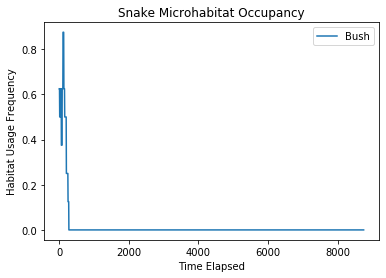

In [11]:
df = data.groupby(["time","habitat_type"]).agg({'snake_pop': ['sum']}).reset_index()
df.columns = ['time','habitat_type','snake_pop']
df = df.pivot(index='time', columns='habitat_type', values='snake_pop').reset_index()
print('Snake')
print('Proportion of Time in Bush')
print(df['BUSH'].sum()/(df['BUSH'].sum()+df['OPEN'].sum()))
df['BUSH_OCC'] = df['BUSH']/(df['BUSH']+df['OPEN'])
df['OPEN_OCC'] = df['OPEN']/(df['BUSH']+df['OPEN'])
df= df[['time','BUSH_OCC','OPEN_OCC']]
# line 1 points

# plotting the line 1 points 
plt.plot(df['time'], df['BUSH_OCC'], label = "Bush")
# line 2 points

#plt.plot(df['time'], df['OPEN_OCC'], label = "Open")
plt.xlabel('Time Elapsed')
# Set the y axis label of the current axis.
plt.ylabel('Habitat Usage Frequency')
# Set a title of the current axes.
plt.title('Snake Microhabitat Occupancy')
# show a legend on the plot
plt.legend()
# Display a figure.

plt.show()

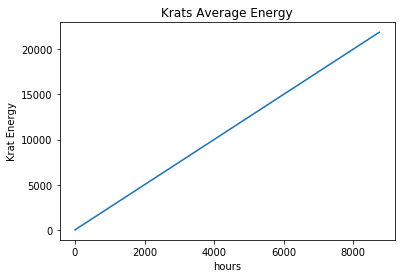

In [12]:
df = pd.DataFrame(data[["time","krat_pop", "krat_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_krat_energy'] = df['krat_energy']/df['krat_pop']
ytemp = list(df['average_krat_energy'])
#if y>0
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krat Energy")
plt.title("Krats Average Energy")

plt.show()

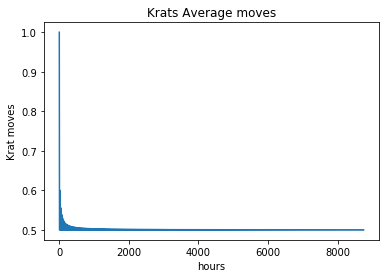

In [13]:
df = pd.DataFrame(data[["time","krat_pop", "krat_movement"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_krat_movment'] = (df['krat_movement']/df['krat_pop'])/df['time']
ytemp = list(df['average_krat_movment'])
#if y>0
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krat moves")
plt.title("Krats Average moves")

plt.show()

8.0


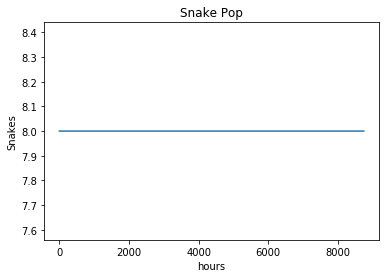

In [14]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "snake_pop"]].groupby("time").sum()
ytemp = list(df.stack())
y = [float(y) for y in ytemp]
xtemp= list(df.index)
#xtemp = list(df['time_of_day'])
x = xtemp[0:len(y)]
print(min(y))


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snakes")
plt.title("Snake Pop")

plt.show()

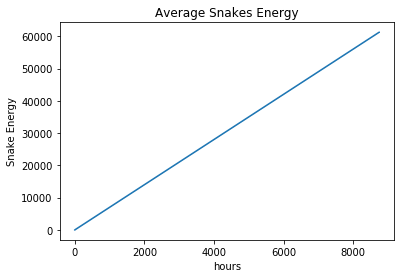

In [15]:
df = pd.DataFrame(data[["time","snake_pop", "snake_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_snake_energy'] = df['snake_energy']/df['snake_pop']
ytemp = list(df['average_snake_energy'])
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snake Energy")
plt.title("Average Snakes Energy")

plt.show()

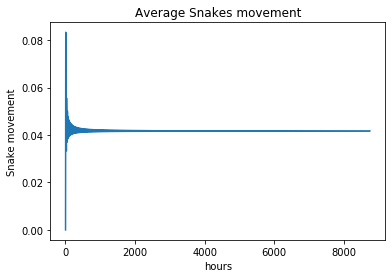

In [16]:
df = pd.DataFrame(data[["time","snake_pop", "snake_movement"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_snake_movement'] = (df['snake_movement']/df['snake_pop'])/df['time']
ytemp = list(df['average_snake_movement'])
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snake movement")
plt.title("Average Snakes movement")

plt.show()

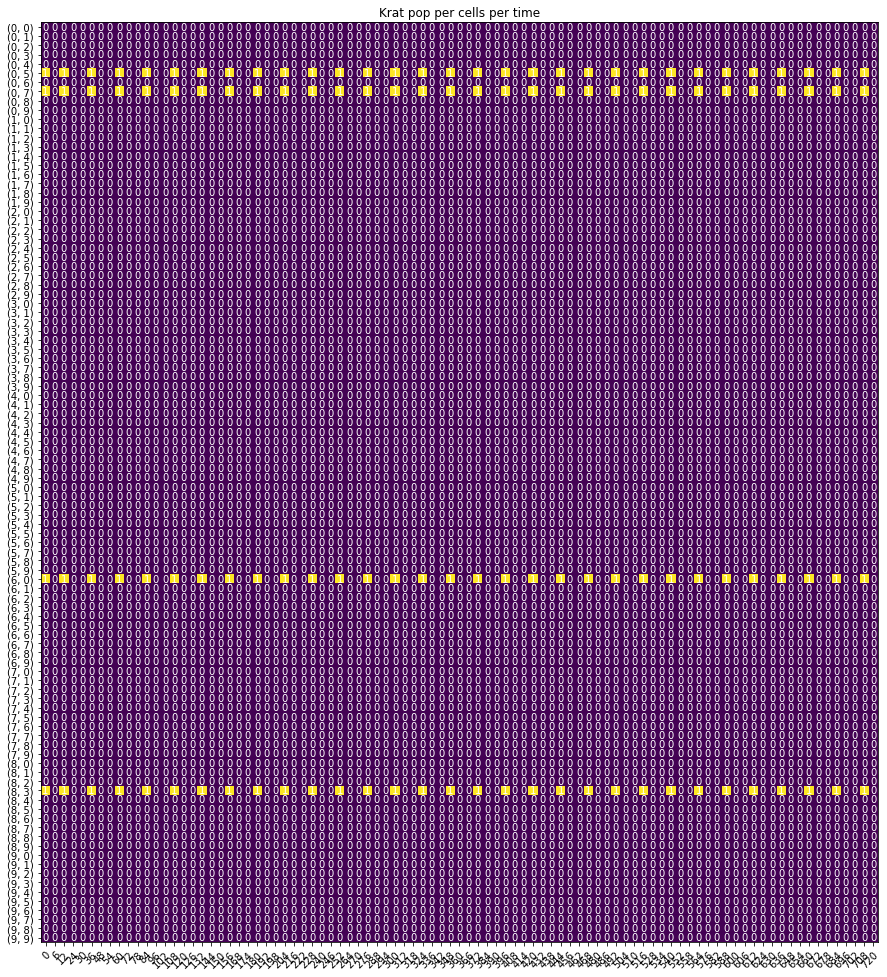

In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

df = data[['time','cell_id','krat_pop']]

def cell_id_analysis(width,length):
    cell_ids = []
    for x in range(width+1):
        for y in range(length+1):
            cell_id = (x,y)
            cell_ids.append(cell_id)
    return cell_ids

cell_ids =  cell_id_analysis(9,9)
cell_ids = [str(cell_id) for cell_id in cell_ids]
df =df[df['time'] <= 720]
df =df[df.cell_id.isin(cell_ids)]
newdf = df.pivot(index='cell_id', columns='time', values='krat_pop')
time = df['time'].unique()
info = np.array(newdf)
newdf.reset_index(inplace=True)
m = pd.DataFrame(newdf)
cells = m['cell_id'].unique()

fig, ax = plt.subplots(figsize=(15,30))
im = ax.imshow(info)

# We want to show all ticks...
ax.set_xticks(np.arange(len(time)))
ax.set_yticks(np.arange(len(cells)))
# ... and label them with the respective list entries
ax.set_xticklabels(time)
ax.set_yticklabels(cells)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cells)):
    for j in range(len(time)):
        text = ax.text(j, i, int(info[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Krat pop per cells per time")
#fig.tight_layout()
plt.show()

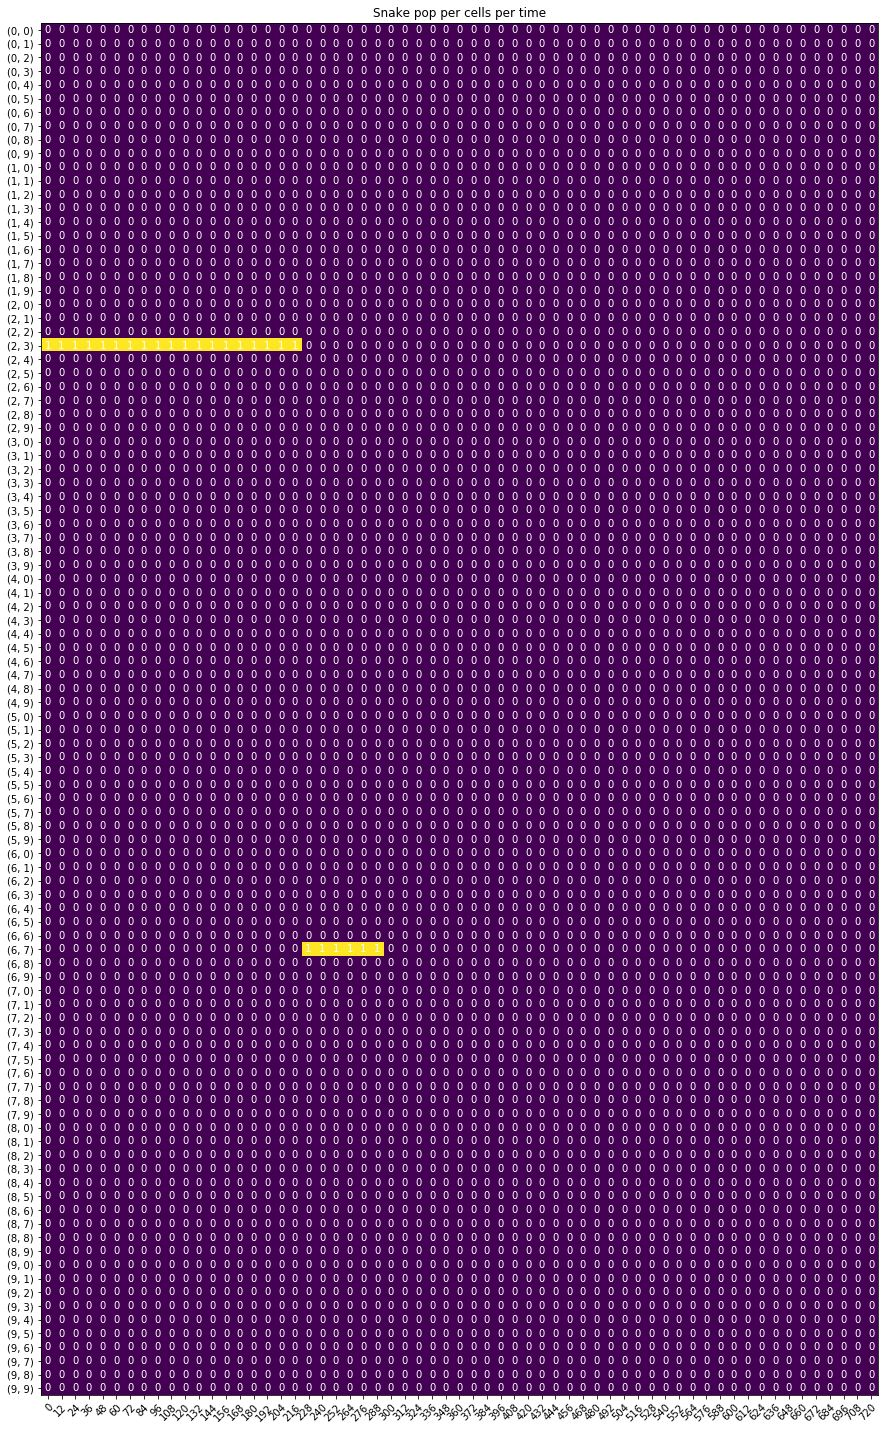

In [13]:

df = data[['time','cell_id','snake_pop']]
cell_ids =  cell_id_analysis(9,9)
cell_ids = [str(cell_id) for cell_id in cell_ids]
df =df[df['time'] <= 720]
df =df[df.cell_id.isin(cell_ids)]
newdf = df.pivot(index='cell_id', columns='time', values='snake_pop').fillna(0)
time = df['time'].unique()
info = np.array(newdf)
newdf.reset_index(inplace=True)
m = pd.DataFrame(newdf)
cells = m['cell_id'].unique()

fig, ax = plt.subplots(figsize=(15,30))
im = ax.imshow(info)

# We want to show all ticks...
ax.set_xticks(np.arange(len(time)))
ax.set_yticks(np.arange(len(cells)))
# ... and label them with the respective list entries
ax.set_xticklabels(time)
ax.set_yticklabels(cells)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cells)):
    for j in range(len(time)):
        text = ax.text(j, i, int(info[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Snake pop per cells per time")
#fig.tight_layout()
plt.show()

In [2]:
import math
def probability_time_step_adjustment(probability_success,time_step,number_of_successes):
    p = probability_success
    q = 1-probability_success
    cn = math.factorial(int(time_step))/(math.factorial(int(time_step - number_of_successes))*math.factorial(int(number_of_successes)))
    prob = cn*p**(number_of_successes)*q**(time_step - number_of_successes)
    return prob


prob_of_success = (7/32)
time_step = 6
for i in range(time_step):
    new_prob =  probability_time_step_adjustment(probability_success = prob_of_success ,time_step = time_step,number_of_successes = i)
    print('i: {}, new prob: {}'.format(i,new_prob))

i: 0, new prob: 0.22737367544323206
i: 1, new prob: 0.38198777474462986
i: 2, new prob: 0.2673914423212409
i: 3, new prob: 0.0998261384665966
i: 4, new prob: 0.020963489077985287
i: 5, new prob: 0.002347910776734352
